## MiniGL :: Primitives

In [29]:
import numpy as np

In [325]:
from matplotlib import pyplot as plt
%matplotlib inline
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img)
    plt.show()

In [326]:
from skimage import io

In [98]:
def pixel(p, image, color):
    image[p[0]][p[1]] = color

In [176]:
def aligned_rectangle(p, q, image, color):
    image[p[0]:q[0], p[1]:q[1]] = color

In [202]:
# First attempt
def line(a, b, image, color):
    a = np.asarray(a)
    b = np.asarray(b)
    d = b - a
    for t in np.arange(0, 1.01, 0.01):
        p = (a + d*t).astype(int)
        pixel(p, image, color)            

In [271]:
# Second  attempt
def line(a, b, image, color):
    a = np.asarray(a)
    b = np.asarray(b)
    d = b - a
    for x in np.arange(a[0], b[0]+1):
        t = (x - a[0])/(b[0] - a[0])
        y = int(a[1] * (1 - t) + b[1] * t)
        pixel((x,y), image, color)

In [306]:
# Third attempt
def line(a, b, image, color):    
    a = np.asarray(a)
    b = np.asarray(b)
    d = b - a
    steep = False
    if(np.abs(d[0]) < np.abs(d[1])):
        a = a[::-1]
        b = b[::-1]
        d = b - a
        steep = True
    if a[0] > b[0]:
        a, b = b, a
    for x in np.arange(a[0], b[0]+1):
        t = (x - a[0])/(b[0] - a[0])
        y = int(a[1] * (1 - t) + b[1] * t)    
#         print(x, y)
        pixel((y, x) if steep else (x,y), image, color)

https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm

In [324]:
# Fourth attempt
def line(a, b, image, color):    
    a = np.asarray(a)
    b = np.asarray(b)
    d = b - a
    steep = False
    if(np.abs(d[0]) < np.abs(d[1])):
        a = a[::-1]
        b = b[::-1]
        steep = True
    if a[0] > b[0]:
        a, b = b, a
    d = b - a
    e = np.abs(d[1]/d[0])
    error = 0
    y = a[1]
    for x in np.arange(a[0], b[0]+1):
        pixel((y, x) if steep else (x,y), image, color)
        error += e
        if error > 0.5 : 
            y += 1 if b[1] > a[1] else -1
            error -= 1        

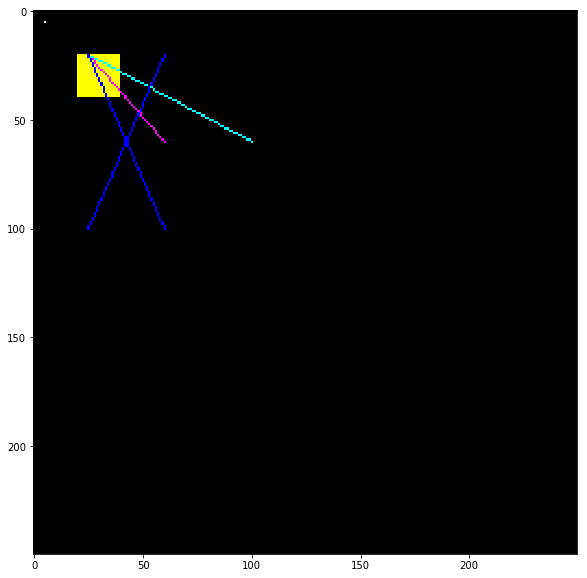

In [323]:
image = np.zeros((250, 250, 3))
aligned_rectangle((20, 20), (40, 40), image, (1, 1, 0))
line( (20, 25), (60, 60), image, (1, 0, 1) )
line( (20, 25), (60, 100), image, (0, 1, 1) )
line( (20, 25), (100, 60), image, (0, 0, 1) )
line( (100, 25), (20, 60), image, (0, 0, 1) )
pixel((5, 5), image, (1, 1, 1))
show(image)

In [328]:
skimage.io.imsave("test.jpg", image)

D:\Installations\Anaconda\envs\minigl\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [333]:
im2 = (image * 255).astype(np.uint8)

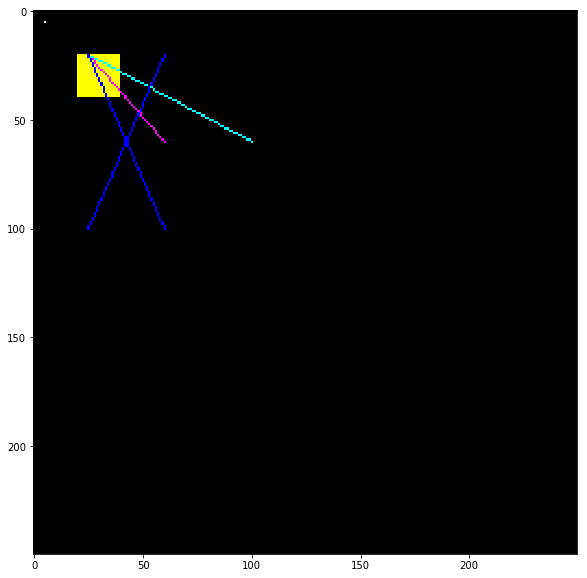

In [334]:
show(im2)